170498071/170498071 [==============================] - 2s 0us/step


Epoch 1/20
1563/1563 [==============================] - 584s 368ms/step - loss: 1.9912 - accuracy: 0.2340 - val_loss: 1.6803 - val_accuracy: 0.3706
Epoch 2/20
1563/1563 [==============================] - 578s 370ms/step - loss: 1.5989 - accuracy: 0.4052 - val_loss: 1.4425 - val_accuracy: 0.4792
Epoch 3/20
1563/1563 [==============================] - 578s 370ms/step - loss: 1.3932 - accuracy: 0.4950 - val_loss: 1.4371 - val_accuracy: 0.5090
Epoch 4/20
1563/1563 [==============================] - 573s 367ms/step - loss: 1.2427 - accuracy: 0.5544 - val_loss: 1.2894 - val_accuracy: 0.5481
Epoch 5/20
1563/1563 [==============================] - 609s 390ms/step - loss: 1.1166 - accuracy: 0.6028 - val_loss: 1.1941 - val_accuracy: 0.5861
Epoch 6/20
1563/1563 [==============================] - 576s 368ms/step - loss: 1.0265 - accuracy: 0.6423 - val_loss: 1.1194 - val_accuracy: 0.6145
Epoch 7/20
1563/1563 [==============================] - 568s 364ms/step - loss: 0.9499 - accuracy: 0.6729 - val_

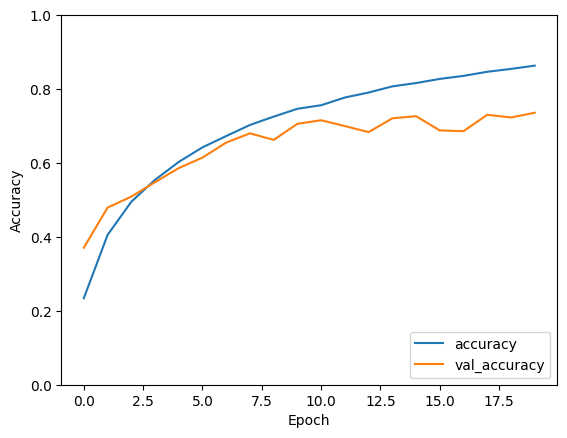

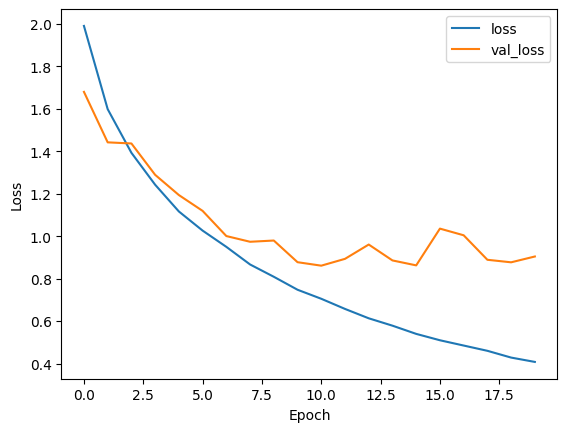

In [2]:
#GOOGLENET CIFAR
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Concatenate, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define GoogLeNet model
def inception_module(x, filters):
    branch1x1 = Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)

    branch3x3 = Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    branch3x3 = Conv2D(filters[2], (3, 3), padding='same', activation='relu')(branch3x3)

    branch5x5 = Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    branch5x5 = Conv2D(filters[4], (5, 5), padding='same', activation='relu')(branch5x5)

    branch_pool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = Conv2D(filters[5], (1, 1), padding='same', activation='relu')(branch_pool)

    return Concatenate(axis=-1)([branch1x1, branch3x3, branch5x5, branch_pool])

input_layer = Input(shape=(32, 32, 3))
x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_layer)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = Conv2D(64, (1, 1), padding='same', activation='relu')(x)
x = Conv2D(192, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = inception_module(x, [64, 96, 128, 16, 32, 32])
x = inception_module(x, [128, 128, 192, 32, 96, 64])
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = inception_module(x, [192, 96, 208, 16, 48, 64])
x = inception_module(x, [160, 112, 224, 24, 64, 64])
x = inception_module(x, [128, 128, 256, 24, 64, 64])
x = inception_module(x, [112, 144, 288, 32, 64, 64])
x = inception_module(x, [256, 160, 320, 32, 128, 128])
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = inception_module(x, [256, 160, 320, 32, 128, 128])
x = inception_module(x, [384, 192, 384, 48, 128, 128])
x = AveragePooling2D((1, 1))(x)
x = Flatten()(x)
x = Dropout(0.4)(x)
output_layer = Dense(10, activation='softmax')(x)

model = Model(input_layer, output_layer)

# Compile the model
model.compile(optimizer=SGD(lr=0.01, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), callbacks=[tensorboard_callback])

# Plot accuracy and loss curves
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


1/1 [==============================] - 1s 834ms/step


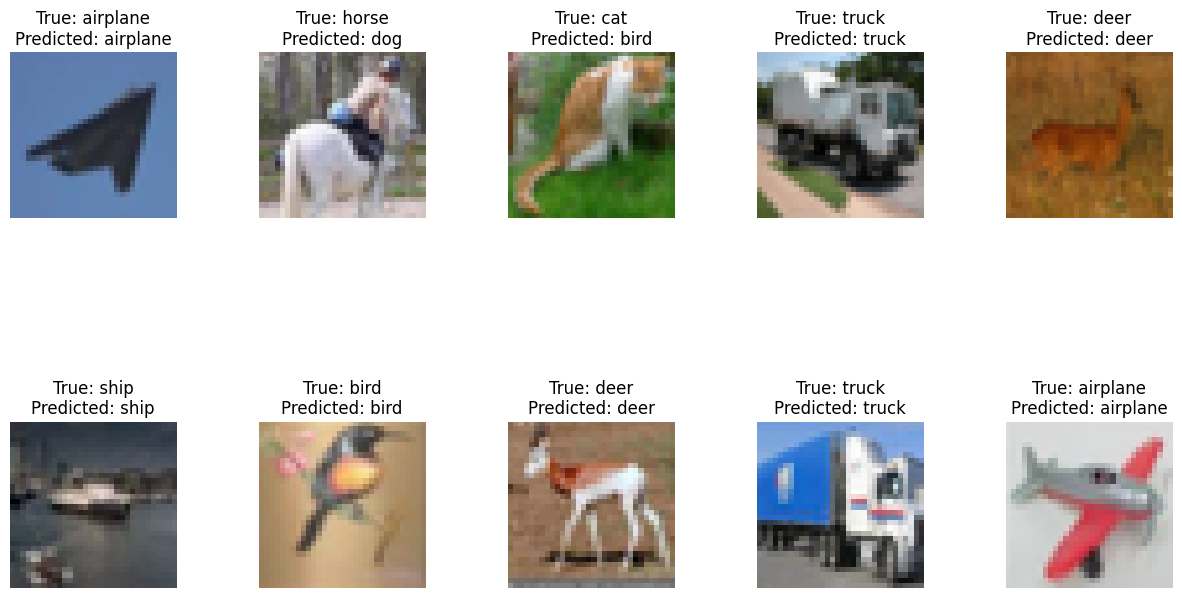

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Choose some random images from the test set
num_images = 10
random_indices = np.random.choice(len(x_test), num_images, replace=False)
sample_images = x_test[random_indices]
sample_labels = y_test[random_indices]

# Make predictions
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Define class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the images with their predicted labels
plt.figure(figsize=(15, 8))
for i in range(num_images):
    plt.subplot(2, num_images // 2, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {class_names[sample_labels[i][0]]}\nPredicted: {class_names[predicted_labels[i]]}")
    plt.axis('off')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()


Epoch 1/50
1563/1563 [==============================] - 56s 35ms/step - loss: 2.3039 - accuracy: 0.1013 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 2/50
1563/1563 [==============================] - 51s 33ms/step - loss: 2.3041 - accuracy: 0.0976 - val_loss: 2.3041 - val_accuracy: 0.1000
Epoch 3/50
1563/1563 [==============================] - 51s 33ms/step - loss: 2.3039 - accuracy: 0.1006 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 4/50
1563/1563 [==============================] - 51s 33ms/step - loss: 2.3037 - accuracy: 0.0979 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 5/50
1563/1563 [==============================] - 51s 33ms/step - loss: 2.3036 - accuracy: 0.1016 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 6/50
1563/1563 [==============================] - 51s 33ms/step - loss: 2.3035 - accuracy: 0.0995 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 7/50
1563/1563 [==============================] - 51s 33ms/step - loss: 2.3036 - accuracy: 0.0968 - val_loss: 2.3035 -

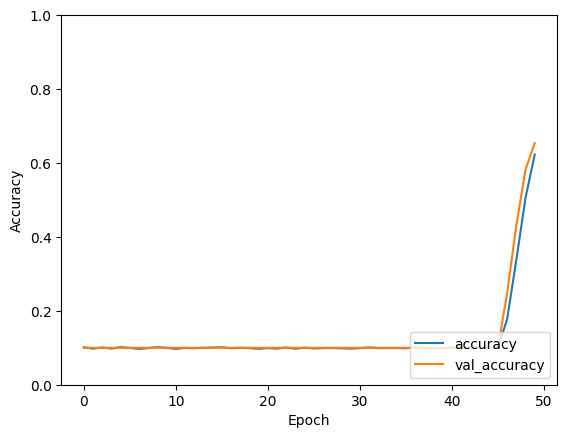

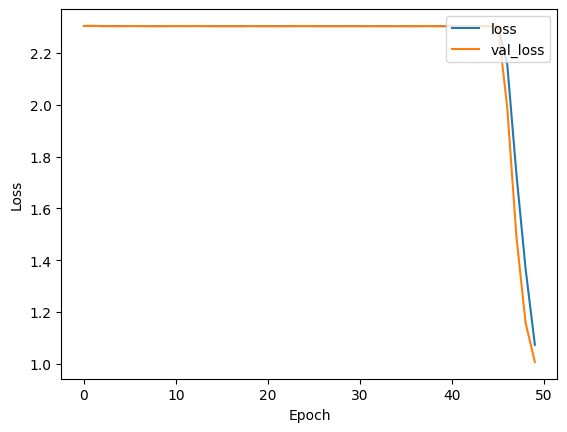

In [ ]:
#VGG CIFAR
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define VGG model architecture
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=SGD(lr=0.01, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

# Plot accuracy and loss curves
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


1/1 [==============================] - 0s 30ms/step


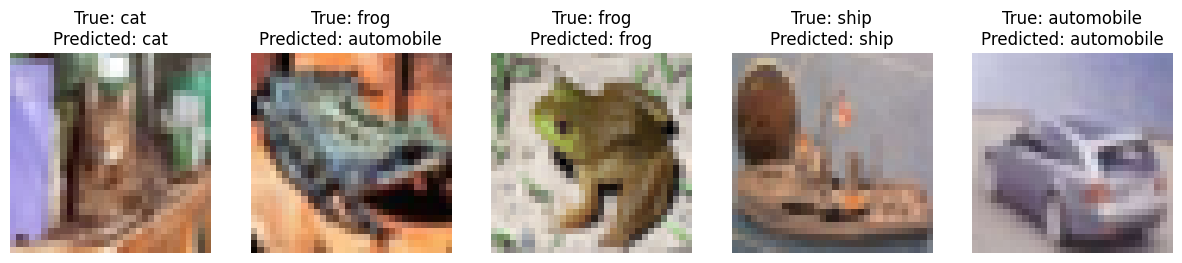

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Choose some random images from the test set
num_images = 5
random_indices = np.random.choice(len(x_test), num_images, replace=False)
sample_images = x_test[random_indices]
sample_labels = y_test[random_indices]

# Make predictions
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Define class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the images with their predicted labels
plt.figure(figsize=(15, 8))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {class_names[sample_labels[i][0]]}\nPredicted: {class_names[predicted_labels[i]]}")
    plt.axis('off')

plt.show()
